# Project 1 

## Group One: Covid 19 | Part One: Data Cleansing 

Team Members: Michael Bien, Lupita Lopez, Jinah Porter, Debra Wu

### Research Questions to Answer:

1. WORLD: Compare COVID deaths by GDP by Country: Does a higher GDP result in a lower number of COVID deaths?

2. US: Examine death rates by age group and determine is children under 10 die at a lower rate, adults 60+ at a higher rate

3. US: Compare cases/deaths by state

4. US: Does pre-COVID state GDP related to the cases/deaths in a given state

5. March shutdown, 4th of July and Memorial Day: compare 2 months of shutdown vs. reopening: how did reopening affect case and death rates? 

6. US: Is there a relationship between COVID cases/deaths and gender?

7. US: Is there a relationship between COVID cases/deaths and ethnicity?


In [4]:
#Import necessary libraries
import pandas as pd
import os
import requests
import numpy as np
import requests
from pprint import pprint
import json
import gmaps
import matplotlib.pyplot as plt
import numpy as np

# Import API key
from api_keys import g_key

Import World Bank data by Country; source: https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.CD&country=#

In [6]:
# Import world_bank_data.csv
file_path = os.path.join("..","source_data","world_bank_data.csv")
world_bank_df = pd.read_csv(file_path)
# Drop countries where the 2018 GDP is null, this is indicated by ".."
#Logic: Countries with no GDP data do not contribute to the analysis by GDP
world_bank_df = world_bank_df[world_bank_df["2018 [YR2018]"] != ".."]
world_bank_df.head()

,Country Name,Country Code,2018 [YR2018]
0,Afghanistan,AFG,19484384937
1,Albania,ALB,15147020535
2,Algeria,DZA,1.74E+11
3,American Samoa,ASM,636000000
4,Andorra,AND,3218316013


In [7]:
# dropping rows by index number range. These rows represent aggregations of the country data and are not useful in the analysis
world_bank_df.drop(world_bank_df.loc[217:263].index, inplace=True)
world_bank_df.tail(5)
# convert 2018 GDP to Millions
world_bank_df["2018 [YR2018]"] = pd.to_numeric(world_bank_df["2018 [YR2018]"])
world_bank_df["2018 [YR2018]"] = round(world_bank_df["2018 [YR2018]"]/1000000,0)
world_bank_df["2018 [YR2018]"] = world_bank_df["2018 [YR2018]"].astype(int)
#Rename 2018 [YR2018] column
world_bank_df.rename(columns={"2018 [YR2018]": "2018 GDP ($MM USD)"}, inplace=True)
world_bank_df

,Country Name,Country Code,2018 GDP ($MM USD)
0,Afghanistan,AFG,19484
1,Albania,ALB,15147
2,Algeria,DZA,174000
3,American Samoa,ASM,636
4,Andorra,AND,3218
...,...,...,...
211,Vietnam,VNM,245000
213,West Bank and Gaza,PSE,14616
214,"Yemen, Rep.",YEM,27591
215,Zambia,ZMB,27005


Johns Hopkins Country Data with iso: https://documenter.getpostman.com/view/10724784/SzYXWz3x?version=latest
Johns Hopkins Case Data by Country: https://documenter.getpostman.com/view/5352730/SzYbyxR5?version=latest

In [8]:
# Grab Johns Hopkins country list with 3 character country code
JH_countries = requests.get("https://covid-api.com/api/regions").json()
JH_countries_list_df = pd.DataFrame(JH_countries["data"])
JH_countries_list_df = JH_countries_list_df[["name","iso"]]
JH_countries_list_df = JH_countries_list_df.sort_values(by='name', ascending=True)
JH_countries_list_df.head()

,name,iso
37,Afghanistan,AFG
106,Albania,ALB
41,Algeria,DZA
70,Andorra,AND
178,Angola,AGO


In [9]:
# create empty columns for deaths, confirmed, recovered
JH_countries_list_df["JH Deaths"] = ""
JH_countries_list_df["JH Confirmed"] = ""
JH_countries_list_df["JH Recovered"] = ""
# create empty list to gather country lookuop errors
JH_country_no_data = []

# John Hopkins base url
base_url = "https://covid19-stats-api.herokuapp.com/api/v1/cases?country="
for index,row in JH_countries_list_df.iterrows():
    country_lookup = row["name"]
    request_url = base_url + country_lookup
    response = requests.get(request_url).json()
    try:
        confirm_JH = response["confirmed"]
        row["JH Confirmed"] = confirm_JH
        death_JH = response["deaths"]
        row["JH Deaths"] = death_JH
        recovered_JH = response["recovered"]
        row["JH Recovered"] = recovered_JH
        print(f"Processing country | {country_lookup} | {response}")
        
    except KeyError:
        print(f"<<Data not found for {country_lookup}")
        JH_country_no_data.append(country_lookup)
        pass
print("** API call complete**")

Processing country | Afghanistan | {'confirmed': 38872, 'deaths': 1436, 'recovered': 32505}
Processing country | Albania | {'confirmed': 11948, 'deaths': 347, 'recovered': 6788}
Processing country | Algeria | {'confirmed': 49194, 'deaths': 1654, 'recovered': 34675}
Processing country | Andorra | {'confirmed': 1483, 'deaths': 53, 'recovered': 1054}
Processing country | Angola | {'confirmed': 3789, 'deaths': 144, 'recovered': 1405}
Processing country | Antigua and Barbuda | {'confirmed': 95, 'deaths': 3, 'recovered': 91}
Processing country | Argentina | {'confirmed': 601713, 'deaths': 12460, 'recovered': 456347}
Processing country | Armenia | {'confirmed': 46671, 'deaths': 925, 'recovered': 42231}
<<Data not found for Aruba
Processing country | Australia | {'confirmed': 26861, 'deaths': 837, 'recovered': 23852}
Processing country | Austria | {'confirmed': 35853, 'deaths': 758, 'recovered': 28044}
Processing country | Azerbaijan | {'confirmed': 38777, 'deaths': 571, 'recovered': 36289}
Pr

Processing country | Kenya | {'confirmed': 36576, 'deaths': 642, 'recovered': 23611}
Processing country | Korea, South | {'confirmed': 22783, 'deaths': 377, 'recovered': 19771}
Processing country | Kosovo | {'confirmed': 12683, 'deaths': 488, 'recovered': 8788}
Processing country | Kuwait | {'confirmed': 97824, 'deaths': 575, 'recovered': 87911}
Processing country | Kyrgyzstan | {'confirmed': 45153, 'deaths': 1063, 'recovered': 41317}
Processing country | Laos | {'confirmed': 23, 'deaths': 0, 'recovered': 22}
Processing country | Latvia | {'confirmed': 1494, 'deaths': 36, 'recovered': 1248}
Processing country | Lebanon | {'confirmed': 26768, 'deaths': 263, 'recovered': 10217}
Processing country | Lesotho | {'confirmed': 1327, 'deaths': 33, 'recovered': 687}
Processing country | Liberia | {'confirmed': 1333, 'deaths': 82, 'recovered': 1214}
Processing country | Libya | {'confirmed': 25822, 'deaths': 409, 'recovered': 13908}
Processing country | Liechtenstein | {'confirmed': 112, 'deaths

Processing country | Venezuela | {'confirmed': 64284, 'deaths': 520, 'recovered': 52564}
Processing country | Vietnam | {'confirmed': 1066, 'deaths': 35, 'recovered': 940}
Processing country | West Bank and Gaza | {'confirmed': 33843, 'deaths': 244, 'recovered': 23060}
Processing country | Western Sahara | {'confirmed': 14, 'deaths': 1, 'recovered': 8}
Processing country | Yemen | {'confirmed': 2022, 'deaths': 585, 'recovered': 1221}
Processing country | Zambia | {'confirmed': 13928, 'deaths': 326, 'recovered': 13029}
Processing country | Zimbabwe | {'confirmed': 7633, 'deaths': 224, 'recovered': 5841}
** API call complete**


In [10]:
print(JH_country_no_data)

['Aruba', 'Cayman Islands', 'Channel Islands', 'Cruise Ship', 'Curacao', 'Faroe Islands', 'French Guiana', 'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Guernsey', 'Jersey', 'Macao SAR', 'Martinique', 'Mayotte', 'Others', 'Puerto Rico', 'Reunion', 'Saint Barthelemy', 'Saint Martin', 'Taipei and environs']


In [11]:
# Drop rows with zero death using the following logic:
# 1. The list of countries and case data were obtained independently from two different Johns Hopkins apis
# 2. Instance where the Johns Hopkins country returns a null for Johns Hopkins cases indicates that the countries with null cases can be droppped as the case data is not being tracked
JH_countries_list_df = JH_countries_list_df[JH_countries_list_df["JH Deaths"] != ""]
JH_countries_list_df.shape

(188, 5)

In [12]:
# merge World Bank and Johns Hopkins dataframes on iso
#rename columns for merge
JH_countries_list_df.rename(columns={"iso":"Country Code"}, inplace=True)
WB_JH_merge_df = pd.merge(world_bank_df,JH_countries_list_df,on="Country Code",how="outer")
WB_JH_merge_df.head()

,Country Name,Country Code,2018 GDP ($MM USD),name,JH Deaths,JH Confirmed,JH Recovered
0,Afghanistan,AFG,19484.0,Afghanistan,1436,38872,32505
1,Albania,ALB,15147.0,Albania,347,11948,6788
2,Algeria,DZA,174000.0,Algeria,1654,49194,34675
3,American Samoa,ASM,636.0,NaN,NaN,NaN,NaN
4,Andorra,AND,3218.0,Andorra,53,1483,1054


In [13]:
# capture rows where there is no JH data
JH_no_data = WB_JH_merge_df[WB_JH_merge_df["JH Deaths"].isnull()]
JH_no_data

,Country Name,Country Code,2018 GDP ($MM USD),name,JH Deaths,JH Confirmed,JH Recovered
3,American Samoa,ASM,636.0,NaN,NaN,NaN,NaN
33,Cayman Islands,CYM,5485.0,NaN,NaN,NaN,NaN
46,Curacao,CUW,3128.0,NaN,NaN,NaN,NaN
69,Greenland,GRL,3052.0,NaN,NaN,NaN,NaN
71,Guam,GUM,5920.0,NaN,NaN,NaN,NaN
78,"Hong Kong SAR, China",HKG,362000.0,NaN,NaN,NaN,NaN
92,Kiribati,KIR,197.0,NaN,NaN,NaN,NaN
94,Kosovo,XKX,7943.0,NaN,NaN,NaN,NaN
105,"Macao SAR, China",MAC,55084.0,NaN,NaN,NaN,NaN
112,Marshall Islands,MHL,221.0,NaN,NaN,NaN,NaN


In [14]:
# drop nulls where there is no JH data - logic:
#This analysis is of case data:
# 1.coutries without case data do not contribute to the analysis 
# 2. The dataset was joined on the iso3, which provides an exact match between datasets
WB_JH_merge_df = WB_JH_merge_df[WB_JH_merge_df["JH Deaths"].notnull()]
# Replace blank Country Names with name
WB_JH_merge_df["Country Name"].fillna(WB_JH_merge_df["name"], inplace=True)
# Fix minor Country Name value issues
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Taiwan*", "Taiwan")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Korea, Rep.", "South Korea")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Gambia, The", "Gambia")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("St. Lucia", "Saint Lucia")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Egypt, Arab Rep.", "Egypt")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Yemen, Rep.", "Yemen")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Congo, Dem. Rep.", "Democratic Republic of the Congo")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Congo, Rep.", "Republic of the Congo")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Kyrgyz Republic", "Kyrgyzstan")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Bahamas, The", "The Bahamas")
WB_JH_merge_df["Country Name"]= WB_JH_merge_df["Country Name"].replace("Congo, Rep.", "Republic of the Congo")
# Convert 2018 GDB to integer
world_bank_df["2018 GDP ($MM USD)"] = world_bank_df["2018 GDP ($MM USD)"].astype(int)
WB_JH_merge_df.head()

,Country Name,Country Code,2018 GDP ($MM USD),name,JH Deaths,JH Confirmed,JH Recovered
0,Afghanistan,AFG,19484.0,Afghanistan,1436,38872,32505
1,Albania,ALB,15147.0,Albania,347,11948,6788
2,Algeria,DZA,174000.0,Algeria,1654,49194,34675
4,Andorra,AND,3218.0,Andorra,53,1483,1054
5,Angola,AGO,101000.0,Angola,144,3789,1405


In [15]:
#Confirming that there are no blank countries on the WB_JH_merge_df
countries_not_on_WB = WB_JH_merge_df[WB_JH_merge_df["Country Name"].isnull()]
countries_not_on_WB.shape

(0, 7)

In [16]:
# Read population table from wiki
WIKI_population_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")
# Return the first table in the list of tables
WIKI_population_df = WIKI_population_df[0]
# use join to rename double header of table
WIKI_population_df.columns = ["_".join(col) for col in WIKI_population_df.columns]
# remove rows that represent the double footer
WIKI_population_df = WIKI_population_df[WIKI_population_df["Rank_Rank"] != "Rank"]
# rename columns
WIKI_population_df.rename(columns={"Rank_Rank": "Rank", "Country (or dependent territory)_Country (or dependent territory)": "Country Name","Area_km2": "Area (km2)","Area_mi2": "Area (mi2)","Population_Population": "Population"}, inplace=True)
WIKI_population_df.rename(columns={"Density_pop./km2": "Population Density (km2)","Density_pop./mi2": "Population Density (mi2)"}, inplace=True)
# limit the df to the necessary columns
WIKI_population_df = WIKI_population_df[["Country Name", "Area (mi2)" , "Population", "Population Density (mi2)"]]
WIKI_population_df
# normalize WIKI_population Country Name values
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Vatican City[note 1]", "Holy See")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Kosovo[note 2]", "Kosovo")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Slovakia", "Slovak Republic")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Saint Vincent and the Grenadines", "St. Vincent and the Grenadines")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Saint Kitts and Nevis", "St. Kitts and Nevis")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("São Tomé and Príncipe", "Sao Tome and Principe")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Northern Cyprus[note 4]", "Cyprus")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Ivory Coast", "Cote d'Ivoire")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Ukraine [note 5]", "Ukraine")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Eswatini (Swaziland)", "Eswatini")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Brunei", "Brunei Darussalam")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Bahamas", "The Bahamas")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Uruguay[note 7][clarification needed]", "Uruguay")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Somaliland[note 8]", "Somalia")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Russia[note 11]", "Russian Federation")
WIKI_population_df["Country Name"]= WIKI_population_df["Country Name"].replace("Western Sahara[note 12]", "Western Sahara")

In [17]:
# merge WB_JH_merge_df with WIKI_population_df
WB_JH_WIKI_merge_df = pd.merge(WB_JH_merge_df,WIKI_population_df,on="Country Name",how="outer")
WB_JH_WIKI_merge_df.head()

,Country Name,Country Code,2018 GDP ($MM USD),name,JH Deaths,JH Confirmed,JH Recovered,Area (mi2),Population,Population Density (mi2)
0,Afghanistan,AFG,19484.0,Afghanistan,1436,38872,32505,249347,31575018,127
1,Albania,ALB,15147.0,Albania,347,11948,6788,11082,2862427,258
2,Algeria,DZA,174000.0,Algeria,1654,49194,34675,919595,43000000,47
3,Andorra,AND,3218.0,Andorra,53,1483,1054,179,76177,425
4,Angola,AGO,101000.0,Angola,144,3789,1405,481354,29250009,61


In [18]:
# Using that to view the head and the tail of WB_JH_WIKI_NaNs to confirm that all nulls are no relevant to the anaysis
WB_JH_WIKI_NaNs = WB_JH_WIKI_merge_df[WB_JH_WIKI_merge_df["Country Code"].isnull()]
WB_JH_WIKI_NaNs.head(50)

,Country Name,Country Code,2018 GDP ($MM USD),name,JH Deaths,JH Confirmed,JH Recovered,Area (mi2),Population,Population Density (mi2)
190,Macau (China),NaN,NaN,NaN,NaN,NaN,NaN,45,696100,54799
191,Hong Kong (China),NaN,NaN,NaN,NaN,NaN,NaN,427,7500700,17565
192,Gibraltar (United Kingdom),NaN,NaN,NaN,NaN,NaN,NaN,2.6,33701,12836
193,Bermuda (United Kingdom),NaN,NaN,NaN,NaN,NaN,NaN,20,64027,3177
194,Sint Maarten (Netherlands),NaN,NaN,NaN,NaN,NaN,NaN,13,42876,3266
195,Jersey (United Kingdom),NaN,NaN,NaN,NaN,NaN,NaN,45,104200,2327
196,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,2324,4976684,2141
197,Guernsey (United Kingdom),NaN,NaN,NaN,NaN,NaN,NaN,30,62723,2083
198,Mayotte (France),NaN,NaN,NaN,NaN,NaN,NaN,144,256518,1776
199,Saint Martin (France),NaN,NaN,NaN,NaN,NaN,NaN,21,35334,1720


In [19]:
# All nulls below have been researched and name normalization has been completed
clean_data_by_country = WB_JH_WIKI_merge_df.dropna()
# Final data cleaning
del clean_data_by_country["name"]
clean_data_by_country.shape

(173, 9)

https://public.opendatasoft.com/explore/dataset/countries-codes/export/

In [20]:
# Import lat and lng data from csv
file_path = os.path.join("..","source_data","geo_spatial_data.csv")
geo_data = pd.read_csv(file_path,encoding = "ISO-8859-1")
# rename ISO3 Code
geo_data.rename(columns={"ISO3 CODE": "Country Code"}, inplace=True)
geo_data = geo_data[["Country Code","Lat","Lng"]]
geo_data.head()

,Country Code,Lat,Lng
0,SSD,NaN,NaN
1,TUR,39.061031,35.167267
2,CHN,36.560206,103.831751
3,LBY,27.030369,18.009595
4,GNB,12.027650,-14.976787


In [21]:
# merge clean data by country with geo_data via left merge
clean_data_by_country = pd.merge(clean_data_by_country,geo_data,on="Country Code",how="left")
# confirm shape in intact
clean_data_by_country.shape

(173, 11)

In [22]:

clean_data_by_country.head()

,Country Name,Country Code,2018 GDP ($MM USD),JH Deaths,JH Confirmed,JH Recovered,Area (mi2),Population,Population Density (mi2),Lat,Lng
0,Afghanistan,AFG,19484.0,1436,38872,32505,249347,31575018,127,33.836449,66.008762
1,Albania,ALB,15147.0,347,11948,6788,11082,2862427,258,41.142382,20.053634
2,Algeria,DZA,174000.0,1654,49194,34675,919595,43000000,47,28.148952,2.653180
3,Andorra,AND,3218.0,53,1483,1054,179,76177,425,42.542353,1.561301
4,Angola,AGO,101000.0,144,3789,1405,481354,29250009,61,-12.292289,17.536979


In [23]:
# Checking dtypes of clean data by country
clean_data_by_country.dtypes

Country Name                 object
Country Code                 object
2018 GDP ($MM USD)          float64
JH Deaths                    object
JH Confirmed                 object
JH Recovered                 object
Area (mi2)                   object
Population                   object
Population Density (mi2)     object
Lat                         float64
Lng                         float64
dtype: object

In [24]:
# save clean data by country to a backup df
country_backup_df = clean_data_by_country

In [25]:
#Conve
clean_data_by_country["2018 GDP ($MM USD)"] = clean_data_by_country["2018 GDP ($MM USD)"].astype(float)
clean_data_by_country["JH Deaths"] = clean_data_by_country["JH Deaths"].astype(str).astype(float)
clean_data_by_country["JH Confirmed"] = clean_data_by_country["JH Confirmed"].astype(str).astype(float)
clean_data_by_country["JH Recovered"] = clean_data_by_country["JH Recovered"].astype(str).astype(float)
clean_data_by_country["Area (mi2)"] = clean_data_by_country["Area (mi2)"].astype(str).astype(float)
clean_data_by_country["Population"] = clean_data_by_country["Population"].astype(str).astype(float)
clean_data_by_country["Population Density (mi2)"] = clean_data_by_country["Population Density (mi2)"].astype(str).astype(float)
clean_data_by_country["JH Deaths"] = clean_data_by_country["JH Deaths"].astype(str).astype(float)
clean_data_by_country["JH Deaths"] = clean_data_by_country["JH Deaths"].astype(str).astype(float)

clean_data_by_country.dtypes

Country Name                 object
Country Code                 object
2018 GDP ($MM USD)          float64
JH Deaths                   float64
JH Confirmed                float64
JH Recovered                float64
Area (mi2)                  float64
Population                  float64
Population Density (mi2)    float64
Lat                         float64
Lng                         float64
dtype: object

In [26]:
# This cell is used to revert to the backup as necessary
#clean_data_by_country = country_backup_df

In [27]:
clean_data_by_country.head()

,Country Name,Country Code,2018 GDP ($MM USD),JH Deaths,JH Confirmed,JH Recovered,Area (mi2),Population,Population Density (mi2),Lat,Lng
0,Afghanistan,AFG,19484.0,1436.0,38872.0,32505.0,249347.0,31575018.0,127.0,33.836449,66.008762
1,Albania,ALB,15147.0,347.0,11948.0,6788.0,11082.0,2862427.0,258.0,41.142382,20.053634
2,Algeria,DZA,174000.0,1654.0,49194.0,34675.0,919595.0,43000000.0,47.0,28.148952,2.653180
3,Andorra,AND,3218.0,53.0,1483.0,1054.0,179.0,76177.0,425.0,42.542353,1.561301
4,Angola,AGO,101000.0,144.0,3789.0,1405.0,481354.0,29250009.0,61.0,-12.292289,17.536979


In [28]:
clean_data_by_country["Population"] = clean_data_by_country["Population"]/1000000
clean_data_by_country.head()

,Country Name,Country Code,2018 GDP ($MM USD),JH Deaths,JH Confirmed,JH Recovered,Area (mi2),Population,Population Density (mi2),Lat,Lng
0,Afghanistan,AFG,19484.0,1436.0,38872.0,32505.0,249347.0,31.575018,127.0,33.836449,66.008762
1,Albania,ALB,15147.0,347.0,11948.0,6788.0,11082.0,2.862427,258.0,41.142382,20.053634
2,Algeria,DZA,174000.0,1654.0,49194.0,34675.0,919595.0,43.000000,47.0,28.148952,2.653180
3,Andorra,AND,3218.0,53.0,1483.0,1054.0,179.0,0.076177,425.0,42.542353,1.561301
4,Angola,AGO,101000.0,144.0,3789.0,1405.0,481354.0,29.250009,61.0,-12.292289,17.536979


In [29]:
# export clean_data_by_country TO CSV
filepath = os.path.join("clean_data_files","clean_data_by_country.csv")
clean_data_by_country.to_csv(filepath)

CDC Data with Ethnicity: https://dev.socrata.com/foundry/data.cdc.gov/vbim-akqf

In [32]:
# Import CDC Data from CSV
file_path = os.path.join("..","source_data","COVID-19_Case_Surveillance_Public_Use_Data.csv")
cdc_raw_data = pd.read_csv(file_path)

D:\Users\mcbie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
cdc_raw_data.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/03,2020/03/03,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
1,2020/03/03,2020/03/03,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
2,2020/04/07,2020/03/03,2020/03/03,Laboratory-confirmed case,Unknown,0 - 9 Years,Unknown,No,Missing,Missing,Missing
3,2020/08/04,2020/08/04,NaN,Probable Case,Male,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
4,2020/07/28,2020/08/04,2020/07/28,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,Missing


In [34]:
#split Race and ethnicity (combined) to isolate Race
cdc_raw_data["Race and ethnicity (combined)"]= cdc_raw_data["Race and ethnicity (combined)"].str.split(", ", n = 1, expand = True)
cdc_raw_data["Race and ethnicity (combined)"].value_counts()

Unknown                                   1604109
White                                      826556
Hispanic/Latino                            622825
Black                                      412907
Multiple/Other                              92105
Asian                                       68917
American Indian/Alaska Native               27041
Native Hawaiian/Other Pacific Islander       7859
Name: Race and ethnicity (combined), dtype: int64

In [35]:
cdc_raw_data.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/03,2020/03/03,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
1,2020/03/03,2020/03/03,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
2,2020/04/07,2020/03/03,2020/03/03,Laboratory-confirmed case,Unknown,0 - 9 Years,Unknown,No,Missing,Missing,Missing
3,2020/08/04,2020/08/04,NaN,Probable Case,Male,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
4,2020/07/28,2020/08/04,2020/07/28,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,Missing


In [36]:
# rename Race and ethnicity (combined) column to Race
cdc_raw_data.rename(columns={"Race and ethnicity (combined)": "Ethnicity"}, inplace=True)
# drop current_status = "Probable Case" as we are only analyzing confirmed cases
cdc_confirmed = cdc_raw_data[cdc_raw_data["current_status"] == "Laboratory-confirmed case"]
#
del cdc_confirmed["current_status"]
len(cdc_confirmed)

3521190

In [37]:
cdc_confirmed["death_yn"].value_counts()

No         1630310
Missing    1115673
Unknown     656346
Yes         118861
Name: death_yn, dtype: int64

In [38]:
# generate series of confirmed cases by Ethnicity, sex and age group
cdc_confirmed_ethnicity = cdc_confirmed.groupby("Ethnicity")["death_yn"].count()
cdc_confirmed_sex = cdc_confirmed.groupby("sex")["death_yn"].count()
cdc_confirmed_age_group = cdc_confirmed.groupby("age_group")["death_yn"].count()

In [39]:
# filter to death no
cdc_confirmed_death_no = cdc_confirmed[cdc_confirmed["death_yn"] == "No"]
# generate series of confirmed cases by Ethnicity, sex and age group
cdc_confirmed_ethnicity_no = cdc_confirmed_death_no.groupby("Ethnicity")["death_yn"].count()
cdc_confirmed_sex_no = cdc_confirmed_death_no.groupby("sex")["death_yn"].count()
cdc_confirmed_age_group_no = cdc_confirmed_death_no.groupby("age_group")["death_yn"].count()

In [40]:
# filter to death yes
cdc_confirmed_death_yes = cdc_confirmed[cdc_confirmed["death_yn"] == "Yes"]
# generate series of confirmed cases by Ethnicity, sex and age group
cdc_confirmed_ethnicity_yes = cdc_confirmed_death_yes.groupby("Ethnicity")["death_yn"].count()
cdc_confirmed_sex_yes = cdc_confirmed_death_yes.groupby("sex")["death_yn"].count()
cdc_confirmed_age_group_yes = cdc_confirmed_death_yes.groupby("age_group")["death_yn"].count()

In [41]:
# create summary dataframes
# Create dictionary of results
ethnicity_dict = {
    "CDC Confirmed": cdc_confirmed_ethnicity,
    "CDC Recovered": cdc_confirmed_ethnicity_no,
    "CDC Death": cdc_confirmed_ethnicity_yes,
}
#Create dataframe from dictionary
cdc_ethnicity = pd.DataFrame(ethnicity_dict)
cdc_ethnicity

,CDC Confirmed,CDC Recovered,CDC Death
Ethnicity,,,
American Indian/Alaska Native,26973,7383,841
Asian,67858,37334,4439
Black,409042,209899,22406
Hispanic/Latino,618428,318995,16821
Multiple/Other,90492,44322,4454
Native Hawaiian/Other Pacific Islander,7825,5278,166
Unknown,1488049,553333,16853
White,812517,453765,52881


In [42]:
# create summary dataframes
# Create dictionary of results
gender_dict = {
    "CDC Confirmed": cdc_confirmed_sex,
    "CDC Recovered": cdc_confirmed_sex_no,
    "CDC Death": cdc_confirmed_sex_yes,
}
#Create dataframe from dictionary
cdc_gender = pd.DataFrame(gender_dict)
cdc_gender

,CDC Confirmed,CDC Recovered,CDC Death
sex,,,
Female,1779089,838417,54481
Male,1649492,747783,63390
Missing,53995,37775,837
Other,38,21,2
Unknown,38558,6307,151


In [43]:
# create summary dataframes
# Create dictionary of results
age_group_dict = {
    "CDC Confirmed": cdc_confirmed_age_group,
    "CDC Recovered": cdc_confirmed_age_group_no,
    "CDC Death": cdc_confirmed_age_group_yes,
}
#Create dataframe from dictionary
cdc_age_group = pd.DataFrame(age_group_dict)
cdc_age_group

,CDC Confirmed,CDC Recovered,CDC Death
age_group,,,
0 - 9 Years,103712,56103,41
10 - 19 Years,257422,131548,71
20 - 29 Years,662852,318687,530
30 - 39 Years,602316,286231,1523
40 - 49 Years,558568,263996,3706
50 - 59 Years,539012,250678,9608
60 - 69 Years,378611,169677,20077
70 - 79 Years,214680,87369,29278
80+ Years,200150,65474,54013


In [45]:
# export cdc data to csvs
filepath1 = os.path.join("clean_data_files","ethnicity summary.csv")
cdc_ethnicity.to_csv(filepath1)
filepath2 = os.path.join("clean_data_files","gender summary.csv")
cdc_gender.to_csv(filepath2)
filepath3 = os.path.join("clean_data_files","age group summary.csv")
cdc_age_group.to_csv(filepath3)

In [46]:
# Correlation JH Deaths to Population Density
x_data = country_data["JH Deaths"]
y_data = country_data["Population Density (mi2)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
plt.title(f"City Latitude vs. Humidity ({today.month}/{today.day}/{today.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#output_path_fig2 = os.path.join("..","output_data","fig2.png")
#plt.savefig(output_path_fig2)

NameError: name 'country_data' is not defined

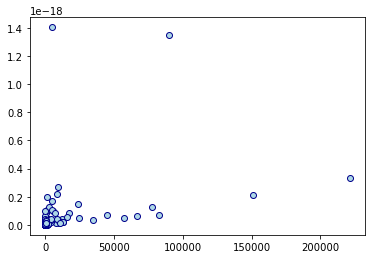

In [102]:
# Correlation JH Deaths to Population
x_data = country_data["JH Deaths"]
y_data = country_data["Population"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")